https://aquaulb.github.io/book_solving_pde_mooc/solving_pde_mooc/notebooks/02_TimeIntegration/02_02_RungeKutta.html#equation-eq-free-fall

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = 9.81  # ms^-2, gravitational constant
h0 = 100. # m, initial height
v0 = 0.   # ms^-1, initial speed

# Spring mass damper  parameters 
# w = 2*np.pi     # natural frequency
# d = .25         # damping ratio

ti = 0.   # s, initial time
tf = 10.0  # s, final time at which to seek the solution
dt = 0.01  # s, time step

In [3]:
nt = int((tf-ti)/dt)

# Create a numpy array to contain the
# intermediate values of y, including
# those at ti and tf.
y = np.empty((nt+1, 2))

# Store initial condition in y[0].
y[0] = 2, 0

# Create vector b.
b = np.array([0., -g])

# Create matrix L.
L = np.array([[0., 1.], [0., 0.]])

# L = np.array([[0,1],[-w**2, -2*d*w]])

# Perform the two-stage time stepping.
for i in range(nt):
#     k_1 = np.dot(L,y[i])+b
#     k_2 = np.dot(L,y[i]+k_1*dt/2)+b
#     k_3 = np.dot(L,y[i]+k_2*dt/2)+b
#     k_4 = np.dot(L,y[i]+k_3*dt)+b
#     y[i+1] = y[i] + dt/6*(k_1 + 2*k_2 + 2*k_3 + k_4)
    y_star = y[i] + 0.5*dt*(np.dot(L, y[i])+b)
    y[i+1] = y[i] + dt*(np.dot(L, y_star)+b)

In [4]:
# array for the time interval data
t = np.arange(nt+1) * dt

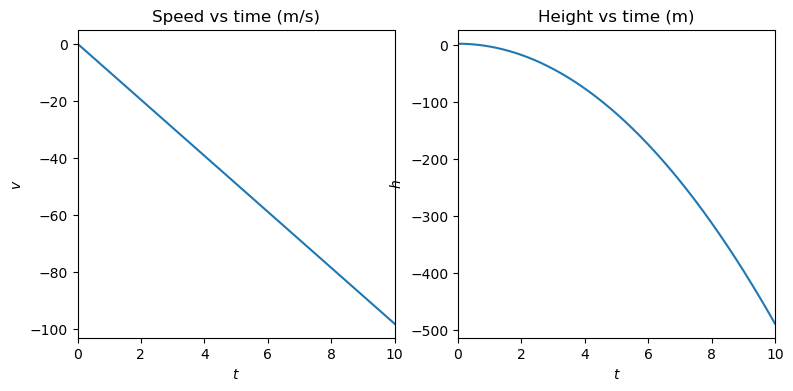

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].plot(t, y[:, 1])

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs time (m/s)')

ax[1].plot(t, y[:, 0])

ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$h$')
ax[1].set_title('Height vs time (m)')

# Let us bind the axes to the relevant
# interval.
for axis in ax:
    axis.set_xlim(t[0], t[-1])